## Analysis of the network
Using networksx

### Imports

In [31]:
import networkx as nx
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import powerlaw

### Defining G graph

In [32]:
edges_df = pd.read_csv("edges.csv")
#edges_df
G = nx.from_pandas_edgelist(edges_df,"Source","Target",create_using=nx.DiGraph)
#nx.draw(G,with_labels=True)

### Diameter

In [35]:
#diameter = nx.diameter(G)

c:\Users\yumi4\wikipedia-usage-network\venv\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


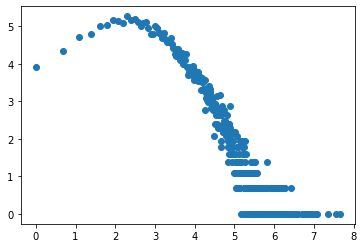

In [34]:
degree_hist = nx.degree_histogram(G)
k_list = np.arange(0,len(degree_hist))
plt.scatter(np.log(k_list),np.log(degree_hist))

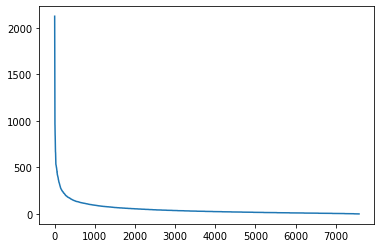

In [36]:
degree_sequence = sorted([d for n,d in G.degree()],reverse=True)
plt.plot(degree_sequence)

Text(0.5, 0, 'k')

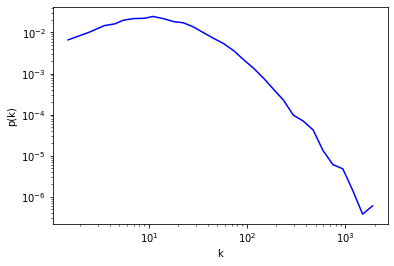

In [37]:
figPDF = powerlaw.plot_pdf(degree_sequence,color='b')
figPDF.set_ylabel(r"p(k)")
figPDF.set_xlabel(r"k")

In [38]:
fit = powerlaw.Fit(degree_sequence,discrete=True)
gamma = fit.power_law.alpha
print("gamma=",gamma)

Calculating best minimal value for power law fit
gamma= 2.791599440301634
